# Basic Simple Linear Regression Project

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
df = pd.read_csv("height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

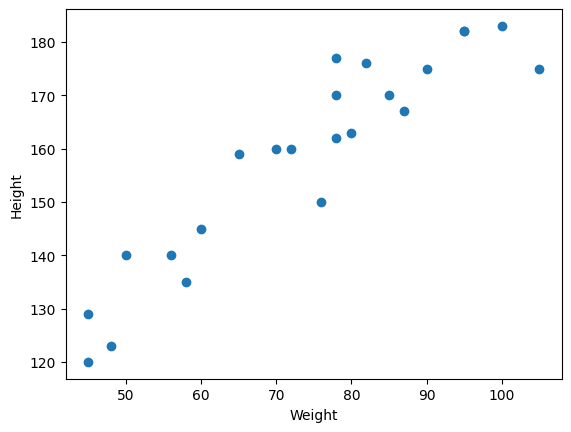

In [43]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [44]:
# divide our dataset into dependent and independent dataset
X = df[['Weight']]  # here 'X' is independent features
y = df['Height']  # dependent feature
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [45]:
# Train and Split dataset based on dependent and independent feature
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=42)
X.shape,X_train.shape,X_test.shape,y.shape,y_test.shape,y_train.shape

((23, 1), (18, 1), (5, 1), (23,), (5,), (18,))

Standardize the dataset, Train independent data

In [46]:
from sklearn.preprocessing import StandardScaler # applying z-score formula

scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

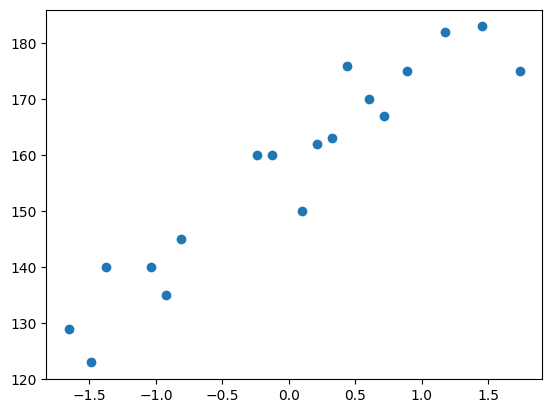

In [47]:
plt.scatter(X_train, y_train)

Train Model using simple linear regression

In [48]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [49]:
print("The slope or coefficient of weight is ",regressor.coef_ )
print("Intercept ", regressor.intercept_)

The slope or coefficient of weight is  [17.03440872]
Intercept  157.5


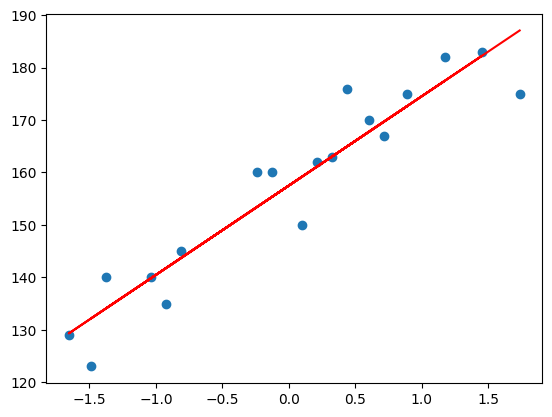

In [50]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), 'r')

Prediction of train data

1. predicted height output = intercept + coef_ * (Weight)
2. y_pred_train = 157.5 +  17.03440872 * (X_train)

Prediction of test data

1. predicted height output = intercept + coef_ * (Weight)
2. y_pred_train = 157.5 +  17.03440872 * (X_test)

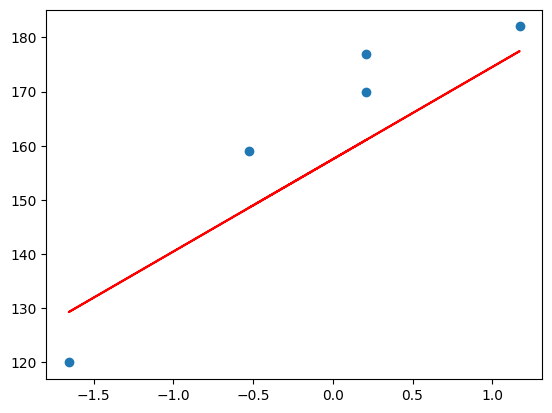

In [51]:
plt.scatter(X_test, y_test)
plt.plot(X_test, regressor.predict(X_test), 'r')

In [52]:
y_pred_test = regressor.predict(X_test) # predicted output
y_pred_test, y_test   # compare y_test(actual output) with y_pred_test (predicted output)


(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

Performance Metrics

MSE, MAE, RMSE

R square and adjusted R square 

In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, regressor.predict(X_test))
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


## R square 
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

In [54]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred_test)
score # 77.6 %

0.776986986042344

## Adjusted R square 
Formula

**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [55]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
# adjusted r2 value will be always greater than r2

0.7026493147231252

In [56]:
regressor

LinearRegression()

# New data point    

Weight = 80

In [57]:
scaled_weight = scaler.transform([[80]])
scaled_weight

e:\GitHub\Python\Python_DataScience\ai-ml-practice\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [58]:
# scaled_weight will go for prediction
print("The height prediction for weight 80 kg is", regressor.predict(scaled_weight)) # regressor.predict([scaled_weight[0]])

The height prediction for weight 80 kg is [163.01076266]


# Assumption

## plot a scatter plot for the prediction

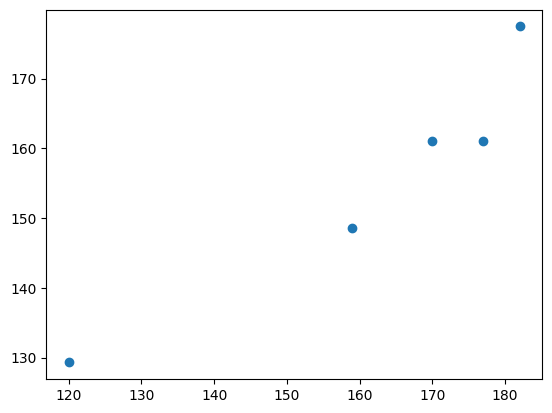

In [59]:
plt.scatter(y_test, y_pred_test)

In [60]:
## Residuals

residuals = y_test - y_pred_test

C:\Users\HP\AppData\Local\Temp\ipykernel_3664\2310617888.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, kde = 'kde')


<Axes: xlabel='Height', ylabel='Density'>

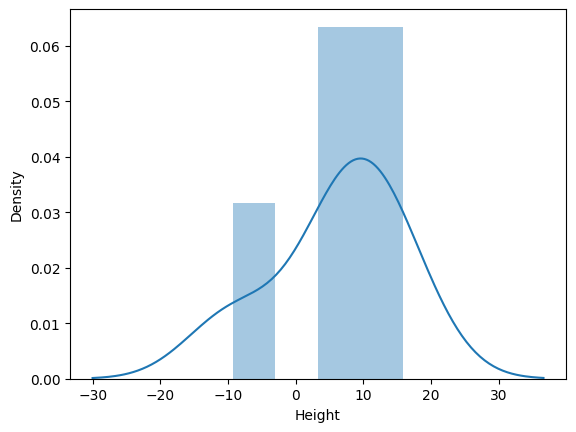

In [61]:
## pllot this residuals
import seaborn as sns
sns.distplot(residuals, kde = 'kde')

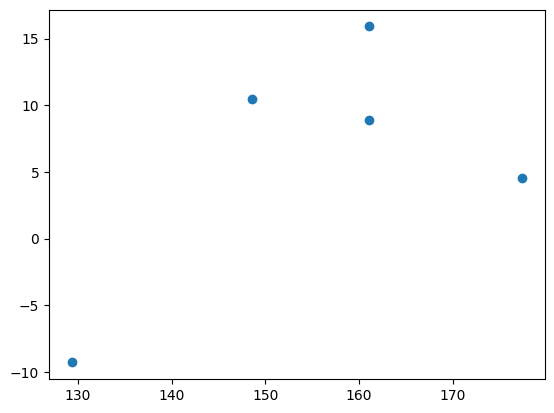

In [62]:
## Scatter plot with respect to prediction and residuals
## It will "Uniform Distribution"
plt.scatter(y_pred_test, residuals)